Produced by Siddhant Singh
@siddhantphy on GitHub
Email: siddhant.singh@tudelft.nl 

# Input parameters for emission based

In [62]:
bell_pair_parameters = {"ent_prot":"single_click","F_prep":0.999,"p_DE":0.01,"mu":0.95,"lambda":1,"eta":0.4472,"alpha":0.002,'pg':0.001}

## Fidelity function and target state

In [2]:
from scipy import sparse as sp
from scipy.linalg import sqrtm
from numpy import trace
from numpy import sqrt

def fidelity(rho, sigma):
    """ Calculates the fidelity of two density matrices according to the 'classical' method """
    if not sp.issparse(rho):
        rho = sp.csr_matrix(rho)
    if not sp.issparse(sigma):
        sigma = sp.csr_matrix(sigma)

    rho_root = sp.csr_matrix(sqrtm(rho.toarray()))
    resulting_matrix = sqrtm((rho_root * sigma * rho_root).toarray())
    return trace(resulting_matrix)

weight = 2
density_matrix_target = sp.lil_matrix((2**weight, 2**weight))
density_matrix_target[0, 0] = 0.5
density_matrix_target[0, 2**weight-1] = 0.5
density_matrix_target[2**weight-1, 0] = 0.5
density_matrix_target[2**weight-1, 2**weight-1] = 0.5

# Photon number resolving scenario

## Single-click

In [35]:
def single_click_pnrs(bell_pair_parameters:dict):
    mu = bell_pair_parameters['mu']
    F_prep = bell_pair_parameters['F_prep']
    labda = bell_pair_parameters['lambda']
    p_DE = bell_pair_parameters['p_DE']
    eta = bell_pair_parameters['eta']
    alpha = bell_pair_parameters['alpha']

    noisy_density_matrix = sp.lil_matrix((2**weight, 2**weight))
    noisy_density_matrix[0,0] = (-1 + alpha)/(-2 + 2*alpha*eta)
    noisy_density_matrix[0,3] = (2*(1 - 2*F_prep)**2*(1 - 2*p_DE)**2*(-1 + alpha)*(-1 + 2*labda)*mu)/(-4 + 4*alpha*eta)
    noisy_density_matrix[2,2] = (alpha*(-1 + eta))/(-1 + alpha*eta)
    noisy_density_matrix[3,0] = (2*(1 - 2*F_prep)**2*(1 - 2*p_DE)**2*(-1 + alpha)*(-1 + 2*labda)*mu)/(-4 + 4*alpha*eta)
    noisy_density_matrix[3,3] = (-1 + alpha)/(-2 + 2*alpha*eta)
    p_bell = 2 * alpha * eta * (1 - alpha * eta)

    return noisy_density_matrix, p_bell

## Double-click

In [29]:
def double_click_pnrs(bell_pair_parameters:dict):
    mu = bell_pair_parameters['mu']
    F_prep = bell_pair_parameters['F_prep']
    labda = bell_pair_parameters['lambda']
    p_DE = bell_pair_parameters['p_DE']
    eta = bell_pair_parameters['eta']
    alpha = 1/2
    pg = bell_pair_parameters['pg']

    noisy_density_matrix = sp.lil_matrix((2**weight, 2**weight))
    noisy_density_matrix[0,0] = (2 - 2*alpha + (-2 + pg)*pg*(1 + alpha*(-2 + eta)))/(4 + 2*(-2 + pg)*pg*eta + 2*alpha*(-2 + pg*(2 + pg*(-2 + eta)*eta)))
    noisy_density_matrix[0,3] = ((1 - 2*F_prep)**2*(1 - 2*p_DE)**4*(-1 + pg)**2*(-1 + alpha)*mu*(sqrt(1 - mu) - sqrt(1 + mu))*(sqrt(1 - mu) + sqrt(1 + mu)))/(4 + 2*(-2 + pg)*pg*eta + 2*alpha*(-2 + pg*(2 + pg*(-2 + eta)*eta)))
    noisy_density_matrix[2,2] = (pg*(pg + 2*(-1 + alpha) + pg*alpha*(-2 + eta))*(-1 + eta))/(2 + (-2 + pg)*pg*eta + alpha*(-2 + pg*(2 + pg*(-2 + eta)*eta)))
    noisy_density_matrix[3,0] = ((1 - 2*F_prep)**2*(1 - 2*p_DE)**4*(-1 + pg)**2*(-1 + alpha)*mu*(sqrt(1 - mu) - sqrt(1 + mu))*(sqrt(1 - mu) + sqrt(1 + mu)))/(4 + 2*(-2 + pg)*pg*eta + 2*alpha*(-2 + pg*(2 + pg*(-2 + eta)*eta)))
    noisy_density_matrix[3,3] = (2 - 2*alpha + (-2 + pg)*pg*(1 + alpha*(-2 + eta)))/(4 + 2*(-2 + pg)*pg*eta + 2*alpha*(-2 + pg*(2 + pg*(-2 + eta)*eta)))

    p_bell = alpha*eta**2*(2 - 2*pg*eta + pg**2*eta + alpha*(-2 + 2*pg + pg**2*(-2 + eta)*eta))

    return noisy_density_matrix, p_bell

# Non-photon number resolving scenario

## Single-click

In [14]:
def single_click_non_pnrs(bell_pair_parameters:dict):
    mu = bell_pair_parameters['mu']
    F_prep = bell_pair_parameters['F_prep']
    labda = bell_pair_parameters['lambda']
    p_DE = bell_pair_parameters['p_DE']
    eta = bell_pair_parameters['eta']
    alpha = bell_pair_parameters['alpha']

    noisy_density_matrix = sp.lil_matrix((2**weight, 2**weight))
    noisy_density_matrix[0,0] = (2 - 2*alpha)/(4 + alpha*eta*(-3 + mu))
    noisy_density_matrix[0,3] = (-2*(1 - 2*F_prep)**2*(1 - 2*p_DE)**2*(-1 + alpha)*(-1 + 2*labda)*sqrt(mu))/(4 + alpha*eta*(-3 + mu))
    noisy_density_matrix[2,2] = (alpha*(4 + eta*(-3 + mu)))/(4 + alpha*eta*(-3 + mu))
    noisy_density_matrix[3,0] = (-2*(1 - 2*F_prep)**2*(1 - 2*p_DE)**2*(-1 + alpha)*(-1 + 2*labda)*sqrt(mu))/(4 + alpha*eta*(-3 + mu))
    noisy_density_matrix[3,3] = (2 - 2*alpha)/(4 + alpha*eta*(-3 + mu))

    p_bell = alpha * eta * (alpha * eta * (mu - 3) + 4) / 2

    return noisy_density_matrix, p_bell

## Double-click

In [20]:
def double_click_non_pnrs(bell_pair_parameters:dict):
    mu = bell_pair_parameters['mu']
    F_prep = bell_pair_parameters['F_prep']
    labda = bell_pair_parameters['lambda']
    p_DE = bell_pair_parameters['p_DE']
    eta = bell_pair_parameters['eta']
    alpha = 1/2
    pg = bell_pair_parameters['pg']

    noisy_density_matrix = sp.lil_matrix((2**weight, 2**weight))
    noisy_density_matrix[0,0] = (2*(8 - 8*alpha + (-2 + pg)*pg*(4 - alpha*(8 + eta*(-3 + mu)))))/(32 + alpha*(-32 + pg*(32 + pg*eta*(8 + eta*(-3 + mu))*(-3 + mu))) - 4*(-2 + pg)*pg*eta*(-3 + mu))
    noisy_density_matrix[0,3] = (-16*(1 - 2*F_prep)**2*(1 - 2*p_DE)**4*(-1 + pg)**2*(-1 + alpha)*mu)/(32 + alpha*(-32 + pg*(32 + pg*eta*(8 + eta*(-3 + mu))*(-3 + mu))) - 4*(-2 + pg)*pg*eta*(-3 + mu))
    noisy_density_matrix[2,2] = (pg*(8 - 8*alpha + pg*(-4 + alpha*(8 + eta*(-3 + mu))))*(4 + eta*(-3 + mu)))/(32 + alpha*(-32 + pg*(32 + pg*eta*(8 + eta*(-3 + mu))*(-3 + mu))) - 4*(-2 + pg)*pg*eta*(-3 + mu))
    noisy_density_matrix[3,0] = (-16*(1 - 2*F_prep)**2*(1 - 2*p_DE)**4*(-1 + pg)**2*(-1 + alpha)*mu)/(32 + alpha*(-32 + pg*(32 + pg*eta*(8 + eta*(-3 + mu))*(-3 + mu))) - 4*(-2 + pg)*pg*eta*(-3 + mu))
    noisy_density_matrix[3,3] = (2*(8 - 8*alpha + (-2 + pg)*pg*(4 - alpha*(8 + eta*(-3 + mu)))))/(32 + alpha*(-32 + pg*(32 + pg*eta*(8 + eta*(-3 + mu))*(-3 + mu))) - 4*(-2 + pg)*pg*eta*(-3 + mu))

    p_bell = (alpha*eta**2*(32 + alpha*(-32 + 32*pg + pg**2*eta*(8 + eta*(-3 + mu))*(-3 + mu)) + 8*pg*eta*(-3 + mu) - 4*pg**2*eta*(-3 + mu)))/16

    return noisy_density_matrix, p_bell

## Results

########### PNRS #################
Fidelity of single-click PNRS state: 0.0
Success probability of single-click PNRS state: 0.49442432
Fidelity of double-click PNRS state: 0.9557231320920101
Success probability of double-click PNRS state: 0.10000448935673603
########### Non-PNRS #################
Fidelity of single-click non-PNRS state: 0.0
Success probability of single-click non-PNRS state: 0.689412464
Fidelity of double-click non-PNRS state: 0.9668924030457791
Success probability of double-click non-PNRS state: 0.10004808133319354
############################


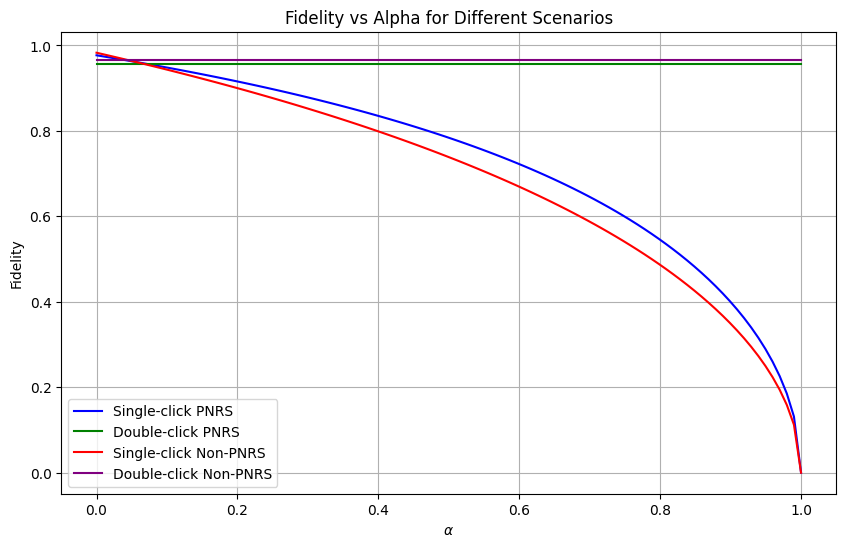

In [58]:
import numpy as np

sc_pnrs_state,sc_pnrs_p_succ = single_click_pnrs(bell_pair_parameters=bell_pair_parameters)
dc_pnrs_state,dc_pnrs_p_succ = double_click_pnrs(bell_pair_parameters=bell_pair_parameters)

sc_non_pnrs_state, sc_non_pnrs_p_succ = single_click_non_pnrs(bell_pair_parameters=bell_pair_parameters)
dc_non_pnrs_state, dc_non_pnrs_p_succ = double_click_non_pnrs(bell_pair_parameters=bell_pair_parameters)

print("########### PNRS #################")
print(f"Fidelity of single-click PNRS state: {fidelity(sc_pnrs_state, density_matrix_target)}")
print(f"Success probability of single-click PNRS state: {sc_pnrs_p_succ}")
print(f"Fidelity of double-click PNRS state: {fidelity(dc_pnrs_state, density_matrix_target)}")
print(f"Success probability of double-click PNRS state: {dc_pnrs_p_succ}")
print("########### Non-PNRS #################")
print(f"Fidelity of single-click non-PNRS state: {fidelity(sc_non_pnrs_state, density_matrix_target)}")
print(f"Success probability of single-click non-PNRS state: {sc_non_pnrs_p_succ}")
print(f"Fidelity of double-click non-PNRS state: {fidelity(dc_non_pnrs_state, density_matrix_target)}")
print(f"Success probability of double-click non-PNRS state: {dc_non_pnrs_p_succ}")
print("############################")

# PLOTTING
import matplotlib.pyplot as plt

alphas = np.linspace(0, 1, 100)
sc_pnrs_fidelities = []
dc_pnrs_fidelities = []
sc_non_pnrs_fidelities = []
dc_non_pnrs_fidelities = []

for alpha in alphas:
    bell_pair_parameters['alpha'] = alpha
    sc_pnrs_state, _ = single_click_pnrs(bell_pair_parameters=bell_pair_parameters)
    dc_pnrs_state, _ = double_click_pnrs(bell_pair_parameters=bell_pair_parameters)
    sc_non_pnrs_state, _ = single_click_non_pnrs(bell_pair_parameters=bell_pair_parameters)
    dc_non_pnrs_state, _ = double_click_non_pnrs(bell_pair_parameters=bell_pair_parameters)
    
    sc_pnrs_fidelities.append(fidelity(sc_pnrs_state, density_matrix_target))
    dc_pnrs_fidelities.append(fidelity(dc_pnrs_state, density_matrix_target))
    sc_non_pnrs_fidelities.append(fidelity(sc_non_pnrs_state, density_matrix_target))
    dc_non_pnrs_fidelities.append(fidelity(dc_non_pnrs_state, density_matrix_target))

plt.figure(figsize=(10, 6))
plt.plot(alphas, sc_pnrs_fidelities, label='Single-click PNRS', color='blue')
plt.plot(alphas, dc_pnrs_fidelities, label='Double-click PNRS', color='green')
plt.plot(alphas, sc_non_pnrs_fidelities, label='Single-click Non-PNRS', color='red')
plt.plot(alphas, dc_non_pnrs_fidelities, label='Double-click Non-PNRS', color='purple')

plt.xlabel(r'$\alpha$')
plt.ylabel('Fidelity')
plt.title('Fidelity vs Alpha for Different Scenarios')
plt.legend()
plt.grid(True)
plt.show()

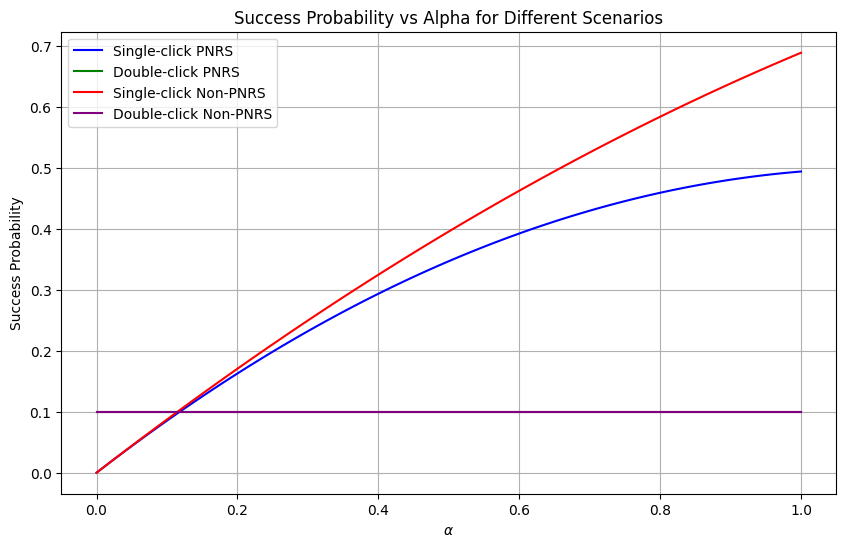

In [63]:
# PLOTTING SUCCESS PROBABILITIES
sc_pnrs_success_probs = []
dc_pnrs_success_probs = []
sc_non_pnrs_success_probs = []
dc_non_pnrs_success_probs = []

for alpha in alphas:
    bell_pair_parameters['alpha'] = alpha
    _, sc_pnrs_p_succ = single_click_pnrs(bell_pair_parameters=bell_pair_parameters)
    _, dc_pnrs_p_succ = double_click_pnrs(bell_pair_parameters=bell_pair_parameters)
    _, sc_non_pnrs_p_succ = single_click_non_pnrs(bell_pair_parameters=bell_pair_parameters)
    _, dc_non_pnrs_p_succ = double_click_non_pnrs(bell_pair_parameters=bell_pair_parameters)
    
    sc_pnrs_success_probs.append(sc_pnrs_p_succ)
    dc_pnrs_success_probs.append(dc_pnrs_p_succ)
    sc_non_pnrs_success_probs.append(sc_non_pnrs_p_succ)
    dc_non_pnrs_success_probs.append(dc_non_pnrs_p_succ)

plt.figure(figsize=(10, 6))
plt.plot(alphas, sc_pnrs_success_probs, label='Single-click PNRS', color='blue')
plt.plot(alphas, dc_pnrs_success_probs, label='Double-click PNRS', color='green')
plt.plot(alphas, sc_non_pnrs_success_probs, label='Single-click Non-PNRS', color='red')
plt.plot(alphas, dc_non_pnrs_success_probs, label='Double-click Non-PNRS', color='purple')

plt.xlabel(r'$\alpha$')
plt.ylabel('Success Probability')
plt.title('Success Probability vs Alpha for Different Scenarios')
plt.legend()
plt.grid(True)
plt.show()